## Master in Science in Data Analytics for Business

CA1 - Statistic for Data Analytics
 
**Student:** Wendy Paola Espinoza Potoy  ID: 2021133

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")

In [2]:
Child_mortality =pd.read_csv("Infant and Neonatal Mortality.csv")

In [3]:
Child_mortality.head()

,Statistic Label,Year,Age Range,Principal Cause of Death,Area,UNIT,VALUE
0,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,Number,NaN
1,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,Number,5.0
2,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,Number,NaN
3,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,Number,1.0
4,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,Number,NaN


In [4]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
Child_mortality = pd.read_csv("Infant and Neonatal Mortality.csv", na_values = missing_value_formats,  dtype={'VALUE': float})

In [5]:
##Using interpolation to handle missing values
Child_mortality['VALUE'].interpolate(method='linear', direction = 'forward', inplace=True) 
print(Child_mortality['VALUE'].head(10)) 

0    NaN
1    5.0
2    3.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: VALUE, dtype: float64


In [6]:
Child_mortality = Child_mortality.dropna()
Child_mortality.count() 


Statistic Label             67391
Year                        67391
Age Range                   67391
Principal Cause of Death    67391
Area                        67391
UNIT                        67391
VALUE                       67391
dtype: int64

In [7]:
Child_mortality.isnull().sum()

Statistic Label             0
Year                        0
Age Range                   0
Principal Cause of Death    0
Area                        0
UNIT                        0
VALUE                       0
dtype: int64

## Exploratory Data Analysis

In [8]:
# Calculare media, median, standar deviation
Value = Child_mortality["VALUE"]
Value

1        5.0000
2        3.0000
3        1.0000
4        1.0000
5        1.0000
          ...  
67387    1.0425
67388    1.2900
67389    1.2900
67390    1.2900
67391    1.2900
Name: VALUE, Length: 67391, dtype: float64

In [9]:
Number = Child_mortality.loc[Child_mortality['UNIT']=='Number']
rate = Child_mortality.loc[Child_mortality['UNIT']=='Rate' ] 

In [10]:
Mortality_rate = pd.merge(Number, rate, on=["Year","Age Range","Principal Cause of Death", "Area", ])
Mortality_rate.shape

(33695, 10)

In [11]:
#drop columns

Mortality_rate = Mortality_rate.drop(["Statistic Label_y", "UNIT_x", "UNIT_y","Statistic Label_x"], axis=1)

Mortality_rate.head()

,Year,Age Range,Principal Cause of Death,Area,VALUE_x,VALUE_y
0,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.0,0.240
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,3.0,0.475
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.0,0.710
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,1.0,0.645
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Longford,1.0,0.580


In [12]:
Mortality_rate = Mortality_rate.rename(columns={"Statistic Label_x":"Statistic Label", "VALUE_x": "Number", "VALUE_y":"Rate" })
Mortality_rate.head()

,Year,Age Range,Principal Cause of Death,Area,Number,Rate
0,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.0,0.240
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,3.0,0.475
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.0,0.710
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,1.0,0.645
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Longford,1.0,0.580


In [13]:
Number = Mortality_rate["Number"]
Rate = Mortality_rate["Rate"]

## Descriptive statistics

In [14]:
def mean(number):
    length = len(number)
    total_sum = 0
    for i in range(length):
        total_sum += number[i]
    average = total_sum / length
    return average

In [15]:
mean_of_number = mean(Number)
print (mean_of_number)

2.358008250482267


In [16]:
np.mean(Number)

2.3580082504822677

In [17]:
def mean(Rate):
    length = len(Rate)
    total_sum = 0
    for i in range(length):
        total_sum += Rate[i]
    average = total_sum / length
    return average

In [18]:
mean_of_rate = mean(Rate)
mean_of_rate

0.8922985606173006

In [19]:
np.mean(Rate)

0.8922985606173023

In [20]:
Number = Mortality_rate["Number"]
def variance(number):
    length=len(number)
    avg=mean(number)
    sumsq=0
    for i in range(length):
        sumsq+=(number[i]-avg)**2
    variance=sumsq/length
    return variance

In [21]:
variance_of_number = variance(Number)
variance_of_number

16.43290664042944

In [47]:
np.var(Number)

16.43290664042944

In [48]:
def std_dev(Number):
    from math import sqrt
    return (sqrt(variance(Number)))

In [50]:
std_dev_of_number = std_dev(Number)
std_dev_of_number 

4.0537521681066595

In [49]:
def std_dev(Rate):
    from math import sqrt
    return (sqrt(variance(Rate)))

In [51]:
std_dev_of_rate = std_dev(Rate)
std_dev_of_rate  

0.8521432981003273

### Printing maximun and minimun values for Number and Rate 

In [56]:
print( "The maximun value for Number of deaths is:", np.max(Number))
print("The minumin value for Number of deaths is:", np.min(Number))

The maximun value for Number of deaths is: 99.0
The minumin value for Number of deaths is: 0.544


In [57]:
print("The maximun value for rate of deaths is:", np.max(Rate))
print("The minumin value for rate of deaths is:", np.min(Rate))

The maximun value for rate of deaths is: 9.92
The minumin value for rate of deaths is: 0.05


## Getting the percentile of Number and Rate

In [52]:
print("0.25th percentile of the Number:", np.quantile(Number,0.25))
print("0.5th percentile of the Number:", np.quantile(Number,0.50))
print("0.75th percentile of the Number:", np.quantile(Number,0.75))

0.25th percentile of the Number: 1.0
0.5th percentile of the Number: 1.0
0.75th percentile of the Number: 2.0


In [58]:
print("0.25th percentile of the rate:", np.quantile(Rate,0.25))
print("0.5th percentile of the rate:", np.quantile(Rate,0.50))
print("0.75th percentile of the rate:", np.quantile(Rate,0.75))

0.25th percentile of the rate: 0.37
0.5th percentile of the rate: 0.6553846153846153
0.75th percentile of the rate: 1.0933333333333333


## Checking Measures of shape

### Skewness


By creating a histogram was posible to see the Rate variable is skewed to the right meaning the majority of the data is positive. It's also posible to observe the Kurtosis is Leptokurtic type because the high and thing. 

In [148]:
Mortality_rate["Rate"].skew()

2.846116582883751

In [149]:
Mortality_rate["Number"].skew()

7.941795329605585

Skewness > 1, meaning the data is skewed to the right due the positive values.

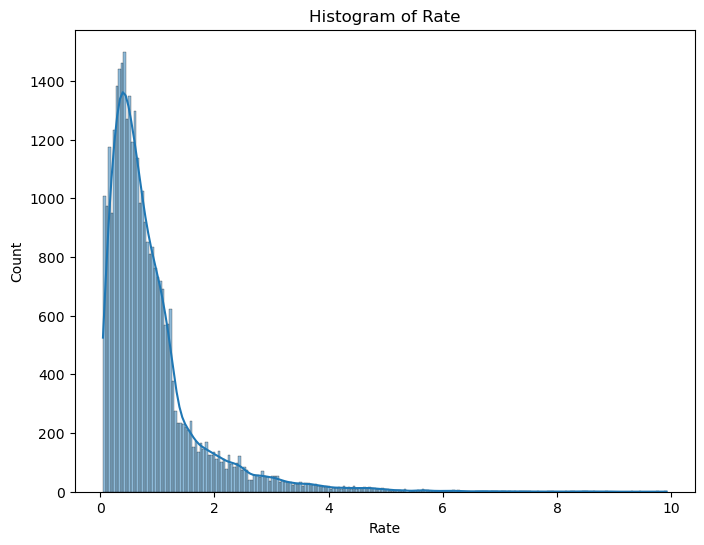

In [72]:
# Create a histogram for the "Rate" variable
plt.figure(figsize=(8, 6))
sns.histplot(Mortality_rate["Rate"], kde=True)
plt.title("Histogram of Rate")
plt.xlabel("Rate")

# Show the plot
plt.show()


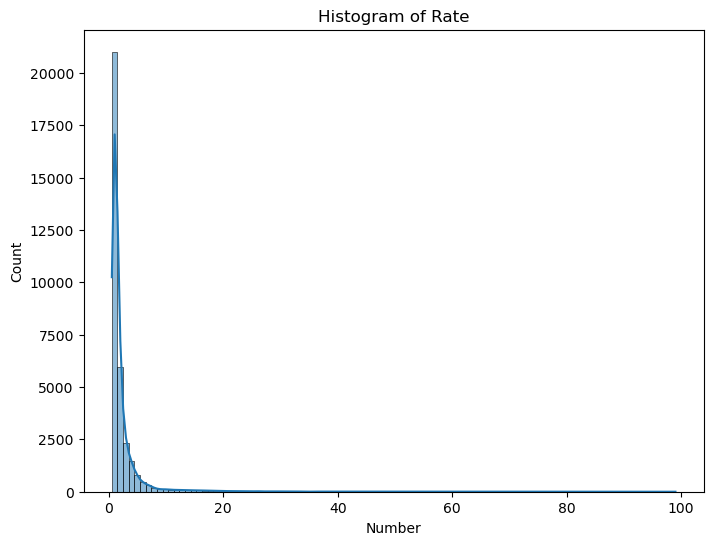

In [83]:
# Create a histogram for the "Number" variable
plt.figure(figsize=(8, 6))
sns.histplot(Mortality_rate["Number"], kde=True, bins=100)
plt.title("Histogram of Rate")
plt.xlabel("Number")

# Show the plot
plt.show()

Using a boxplot was posible to see the outliers in Number and Rate variable. 

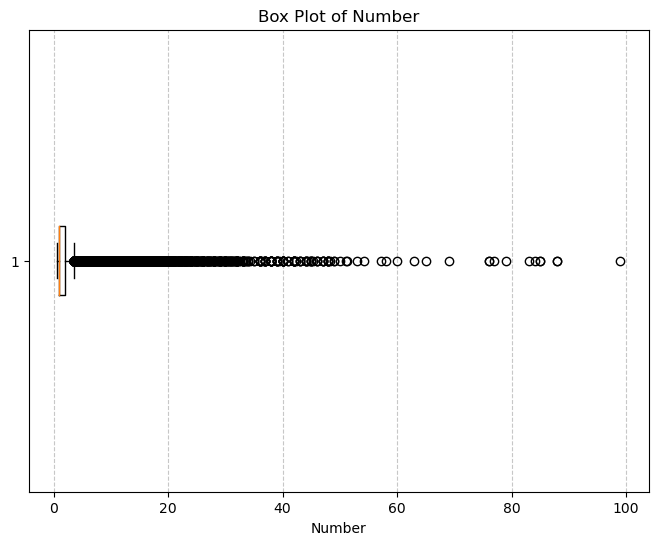

In [84]:
plt.figure(figsize=(8, 6))
plt.boxplot(Mortality_rate["Number"], vert=False)
plt.title("Box Plot of Number")
plt.xlabel("Number")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

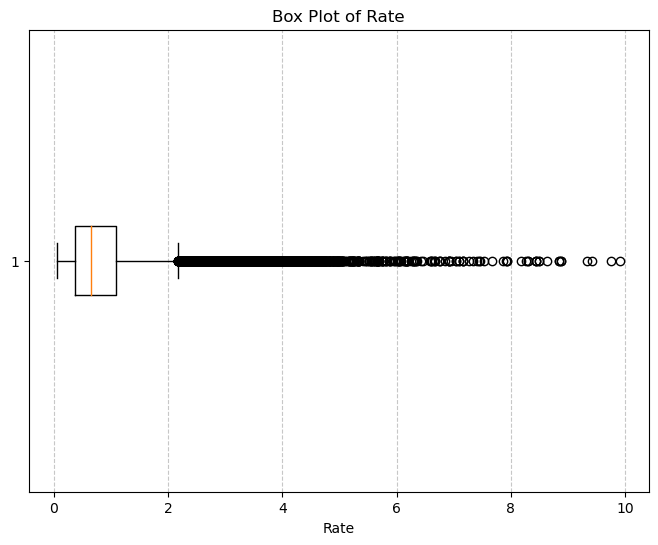

In [85]:
plt.figure(figsize=(8, 6))
plt.boxplot(Mortality_rate["Rate"], vert=False)
plt.title("Box Plot of Rate")
plt.xlabel("Rate")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

## Probabability

In [97]:
Mortality_rate.head()

,Year,Age Range,Principal Cause of Death,Area,Number,Rate
0,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.0,0.240
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,3.0,0.475
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.0,0.710
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,1.0,0.645
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Longford,1.0,0.580


In [91]:
n= len(Mortality_rate)

33695

In [105]:
n = len(Mortality_rate)  # Total number of records in the dataset
prob_die_dublin = (Mortality_rate["Area"] == "Dublin City and County").sum() / n
print("The probability of infant living in Dublin die: {}%".format(100 * prob_die_dublin))

The probability of infant living in Dublin die: 3.7038136221991396%


In [106]:
prob_Infant_0_1year= (Mortality_rate["Age Range"]=="Infant (0-1 year)").sum()/n
print("The probability of Infant (0-1 year) die: {}%".format(100 * prob_Infant_0_1year))

The probability of Infant (0-1 year) die: 24.99777415046743%


# Distributions functions (PMF, PDF,CDF)

In [115]:
#cdf because I have continuos data
#exponential distribution

In [132]:
# Calculate the PMF for the "Number" column
pmf = Mortality_rate["Rate"].value_counts(normalize=True).sort_index()

print(pmf)

Number
0.544000     0.000030
0.696000     0.000030
0.848000     0.000030
1.000000     0.532186
1.008929     0.000030
               ...   
83.000000    0.000030
84.000000    0.000030
85.000000    0.000059
88.000000    0.000059
99.000000    0.000030
Name: proportion, Length: 3902, dtype: float64


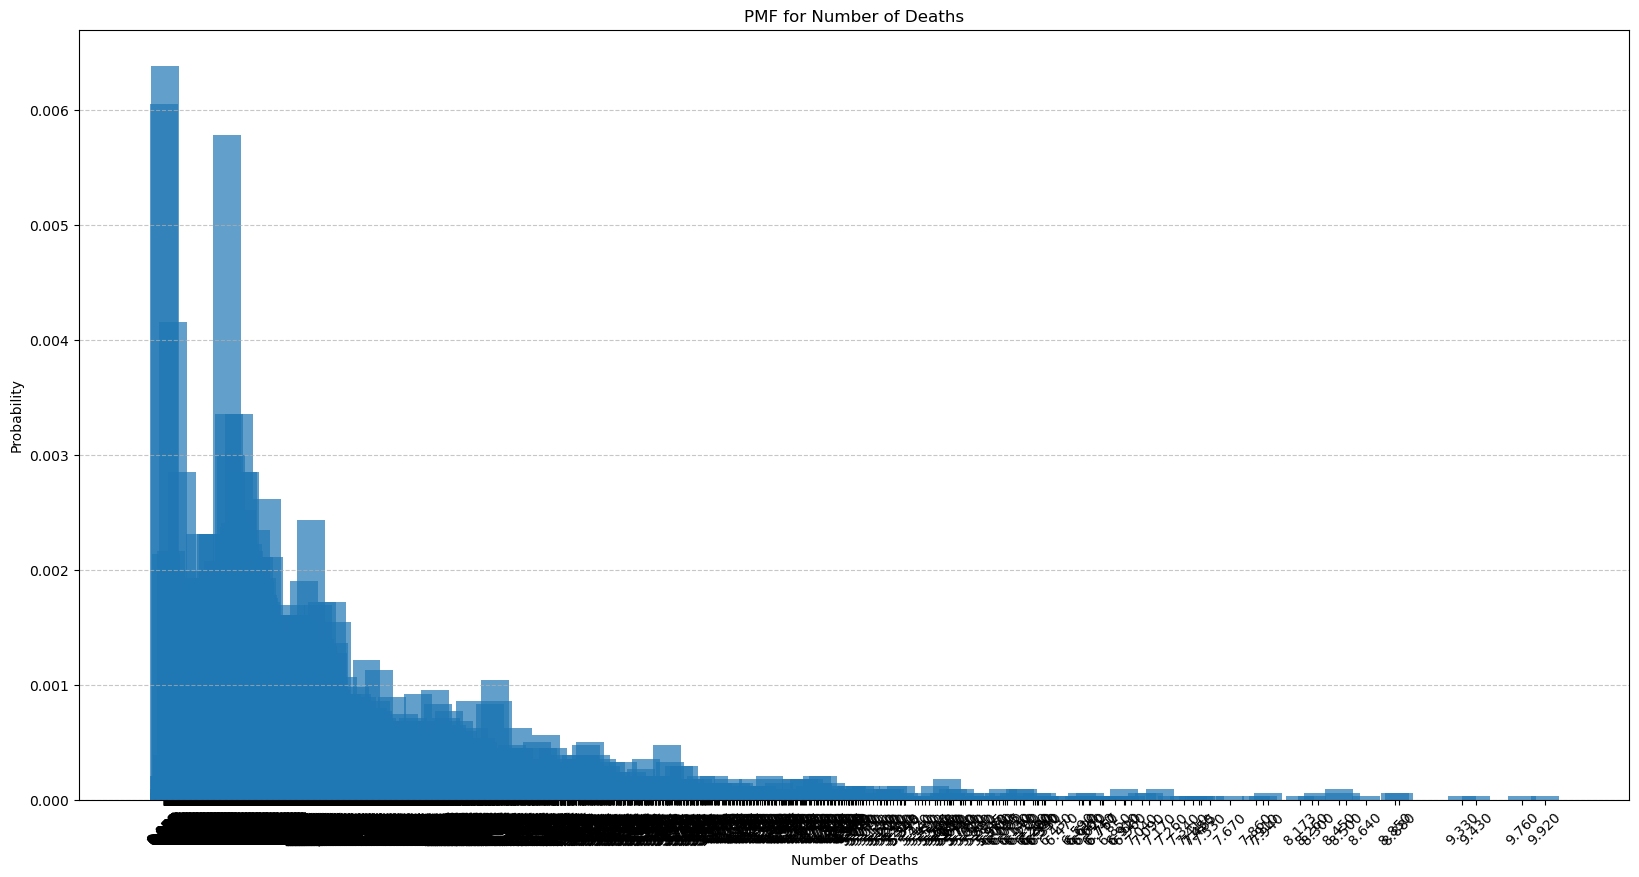

In [136]:
# Calculate the PMF for the "Number" column
pmf = Mortality_rate["Rate"].value_counts(normalize=True).sort_index()

# Create a bar chart to visualize the PMF
plt.figure(figsize=(20, 10))
plt.bar(pmf.index, pmf.values, width=0.2, align='center', alpha=0.7,)
plt.xlabel("Number of Deaths")
plt.ylabel("Probability")
plt.title("PMF for Number of Deaths")
plt.xticks(pmf.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [139]:
cdf=Cdf.from_seq(Mortality_rate["Rate"].value_counts(normalize=True).sort_index())
cdf

,probs
proportion,
0.000030,0.779864
0.000059,0.898594
0.000089,0.933120
0.000119,0.949780
0.000148,0.959558
...,...
0.003354,0.999759
0.004155,0.999819
0.005787,0.999879


Rate
0.050000    0.006054
0.050617    0.006084
0.050729    0.006114
0.051235    0.006143
0.051458    0.006173
              ...   
8.880000    0.999881
9.330000    0.999911
9.430000    0.999941
9.760000    0.999970
9.920000    1.000000
Name: , Length: 16567, dtype: float64


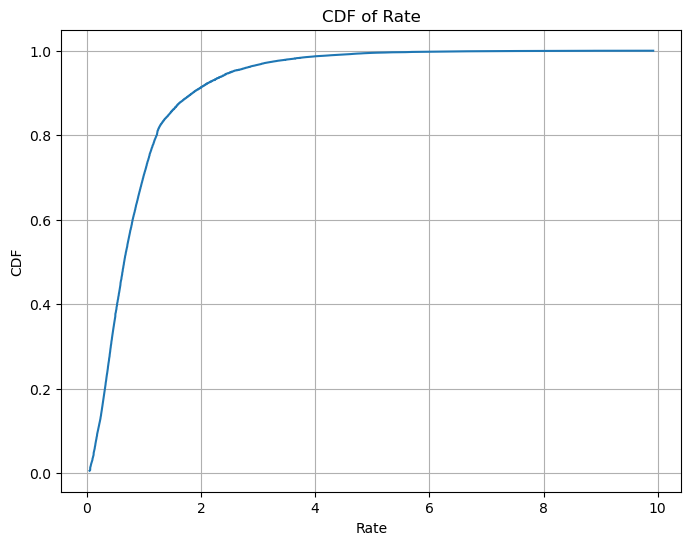

In [141]:
# Create a CDF for the "Rate" column
cdf = Cdf.from_seq(Mortality_rate["Rate"])

# Print the CDF
print(cdf)

# Plot the CDF
plt.figure(figsize=(8, 6))
cdf.plot()
plt.xlabel("Rate")
plt.ylabel("CDF")
plt.title("CDF of Rate")
plt.grid(True)

# Show the plot
plt.show()

In [145]:
from scipy.stats import binom
# Define parameters for the binomial distribution
n = len(Mortality_rate)  # Total number of trials (e.g., 5 observations)
p = 0.10  # Probability of success (modify as needed)

# Calculate the binomial probability mass function (PMF)
x = np.arange(0, n+1)  # Possible number of "successes" (deaths)
pmf = binom.pmf(x, n, p)

# Print the PMF
for i, prob in enumerate(pmf):
    print(f"Number of Rate = {x[i]}, Probability = {prob:.4f}")

Number of Rate = 0, Probability = 0.0000
Number of Rate = 1, Probability = 0.0000
Number of Rate = 2, Probability = 0.0000
Number of Rate = 3, Probability = 0.0000
Number of Rate = 4, Probability = 0.0000
Number of Rate = 5, Probability = 0.0000
Number of Rate = 6, Probability = 0.0000
Number of Rate = 7, Probability = 0.0000
Number of Rate = 8, Probability = 0.0000
Number of Rate = 9, Probability = 0.0000
Number of Rate = 10, Probability = 0.0000
Number of Rate = 11, Probability = 0.0000
Number of Rate = 12, Probability = 0.0000
Number of Rate = 13, Probability = 0.0000
Number of Rate = 14, Probability = 0.0000
Number of Rate = 15, Probability = 0.0000
Number of Rate = 16, Probability = 0.0000
Number of Rate = 17, Probability = 0.0000
Number of Rate = 18, Probability = 0.0000
Number of Rate = 19, Probability = 0.0000
Number of Rate = 20, Probability = 0.0000
Number of Rate = 21, Probability = 0.0000
Number of Rate = 22, Probability = 0.0000
Number of Rate = 23, Probability = 0.0000
Nu

Number of Rate = 28537, Probability = 0.0000
Number of Rate = 28538, Probability = 0.0000
Number of Rate = 28539, Probability = 0.0000
Number of Rate = 28540, Probability = 0.0000
Number of Rate = 28541, Probability = 0.0000
Number of Rate = 28542, Probability = 0.0000
Number of Rate = 28543, Probability = 0.0000
Number of Rate = 28544, Probability = 0.0000
Number of Rate = 28545, Probability = 0.0000
Number of Rate = 28546, Probability = 0.0000
Number of Rate = 28547, Probability = 0.0000
Number of Rate = 28548, Probability = 0.0000
Number of Rate = 28549, Probability = 0.0000
Number of Rate = 28550, Probability = 0.0000
Number of Rate = 28551, Probability = 0.0000
Number of Rate = 28552, Probability = 0.0000
Number of Rate = 28553, Probability = 0.0000
Number of Rate = 28554, Probability = 0.0000
Number of Rate = 28555, Probability = 0.0000
Number of Rate = 28556, Probability = 0.0000
Number of Rate = 28557, Probability = 0.0000
Number of Rate = 28558, Probability = 0.0000
Number of 

In [37]:
Mortality_rate

,Year,Age Range,Principal Cause of Death,Area,Number,Rate
0,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.000,0.2400
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,3.000,0.4750
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.000,0.7100
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,1.000,0.6450
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Longford,1.000,0.5800
...,...,...,...,...,...,...
33690,2018,4 weeks to 1 year,Sudden infant death syndrome,Roscommon,1.000,1.0425
33691,2018,4 weeks to 1 year,Sudden infant death syndrome,Sligo,1.000,1.2900
33692,2018,4 weeks to 1 year,Sudden infant death syndrome,Cavan,0.848,1.2900
33693,2018,4 weeks to 1 year,Sudden infant death syndrome,Donegal,0.696,1.2900


In [38]:
from scipy.stats import norm
Mortality_norm =norm.rvs(size=len(Mortality_rate), loc=0, scale=1)
Mortality_norm

array([ 1.519151  , -0.36022615, -0.86338822, ..., -0.7703444 ,
        2.26705087, -0.41933423])

(array([  31.,  339., 1854., 5569., 9583., 9405., 5064., 1568.,  260.,
          22.]),
 array([-3.85546874, -3.076502  , -2.29753527, -1.51856854, -0.73960181,
         0.03936492,  0.81833165,  1.59729838,  2.37626511,  3.15523184,
         3.93419857]),
 <BarContainer object of 10 artists>)

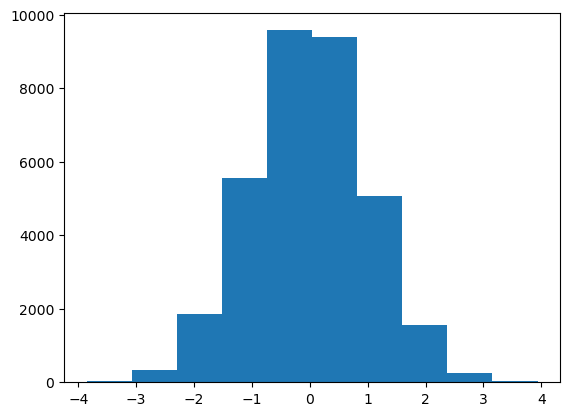

In [39]:
plt.hist(Mortality_norm)

[Text(0.5, 0, 'Normal distribution'), Text(0, 0.5, 'Frequency')]

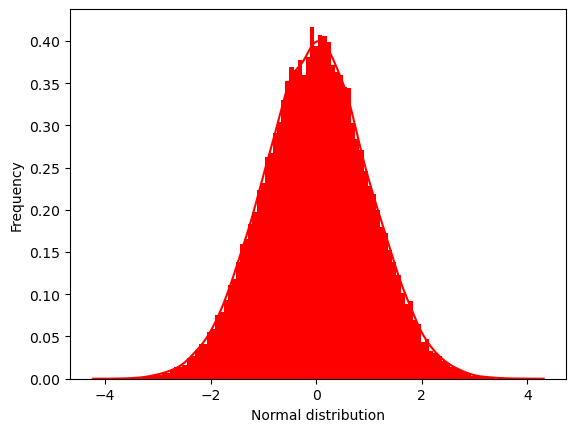

In [40]:
ax=sns.distplot(Mortality_norm, bins =100, kde=True, color="red", hist_kws={"linewidth":1,"alpha":1})
ax.set(xlabel="Normal distribution", ylabel ="Frequency") 

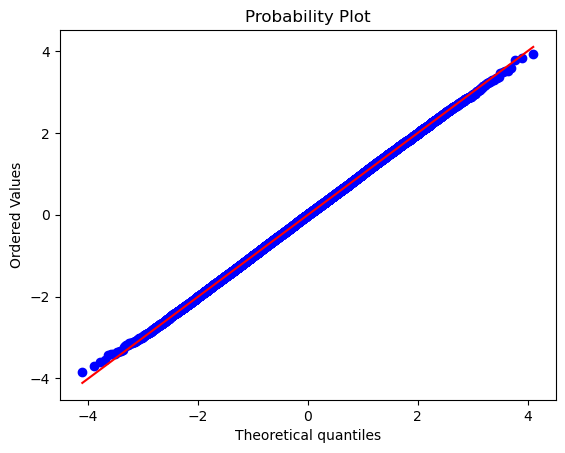

In [157]:
import pylab
import scipy.stats as stats

stats.probplot(Mortality_norm, dist ="norm", plot=pylab)
pylab.show()

In [155]:
from scipy.stats import poisson

Probability of observing 5 deaths in Dublin City and County in 2018: 0.1713


In [158]:
# Filter the dataset for a specific area and year
area = "Dublin City and County"
year = 2018
filtered_data = Mortality_rate[(Mortality_rate["Area"] == area) & (Mortality_rate["Year"] == year)]

# Calculate the average rate (lambda) for the Poisson distribution
average_rate = filtered_data["Number"].mean()

# Create a Poisson distribution with lambda equal to the average rate
poisson_dist = poisson(average_rate)

# Define the range of possible numbers of events
x = np.arange(0, 20)

# Calculate the PMF for each number of events
pmf = poisson_dist.pmf(x)



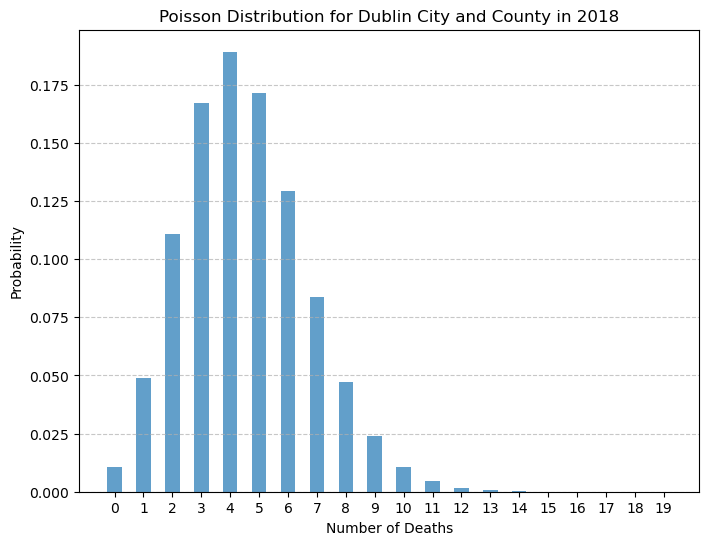

In [159]:
# Create a bar plot to visualize the PMF
plt.figure(figsize=(8, 6))
plt.bar(x, pmf, width=0.5, align='center', alpha=0.7)
plt.xlabel("Number of Deaths")
plt.ylabel("Probability")
plt.title(f"Poisson Distribution for {area} in {year}")
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [164]:
# Filter the dataset for a specific area and year
area = "Dublin City and County"
year = 1980
filtered_data = Mortality_rate[(Mortality_rate["Area"] == area) & (Mortality_rate["Year"] == year)]

# Calculate the average rate (lambda) for the Poisson distribution
average_rate = filtered_data["Number"].mean()

# Create a Poisson distribution with lambda equal to the average rate
poisson_dist = poisson(average_rate)

# Define the range of possible numbers of events
x = np.arange(0, 20)

# Calculate the PMF for each number of events
pmf = poisson_dist.pmf(x)



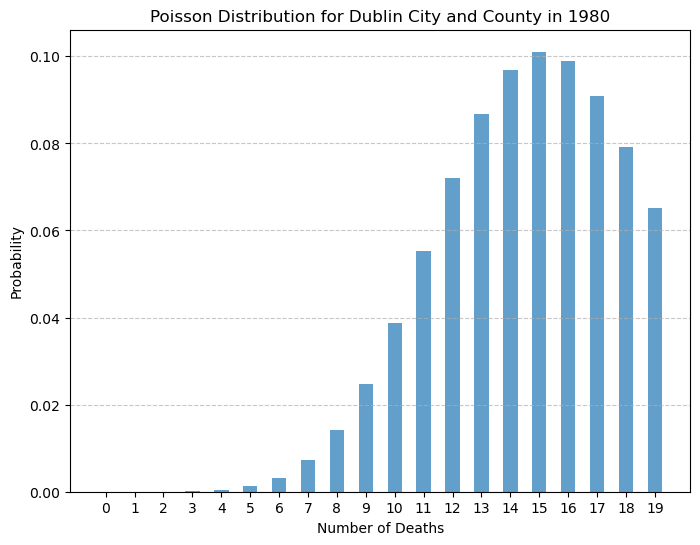

In [165]:
# Create a bar plot to visualize the PMF
plt.figure(figsize=(8, 6))
plt.bar(x, pmf, width=0.5, align='center', alpha=0.7)
plt.xlabel("Number of Deaths")
plt.ylabel("Probability")
plt.title(f"Poisson Distribution for {area} in {year}")
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()